In [1]:
import torch
from pathlib import Path
from siren.models.dcgan import Model as DCGAN
from siren.models.sirengan import Model as SIRENGAN
from siren.models.generate import walk

In [2]:
model = SIRENGAN(channels=1)
model.load(Path('../models/sirengan_mnist').expanduser())

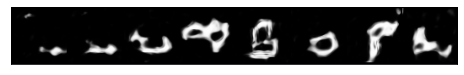

In [3]:
walk(
    model,
    torch.FloatTensor(1, 2),
    torch.randn(1, 2),
    torch.randn(1, 2),
    8,
    Path('../reports/figures/sirengan_mnist'))

In [4]:
from siren.shader.utils import dump, serialize

in_w = dump(model.G.main[0].linear.weight)
in_b = dump(model.G.main[0].linear.bias)
print(in_w)
print(in_b)

out_w = dump(model.G.main[-2].weight)
out_b = dump(model.G.main[-2].bias)
print(out_w)
print(out_b)

[[ 0.02607447 -0.04512336  0.09915072  0.10549906]
 [ 0.12427417 -0.05202053  0.10289342  0.17669764]
 [-0.04086043 -0.18680172  0.04911656  0.01737672]
 [-0.17540507  0.11208125  0.1003417   0.03563786]
 [-0.03933941 -0.14583506  0.08589146 -0.18063432]
 [-0.02366925  0.04312513 -0.10440809 -0.1779063 ]
 [ 0.20748813  0.13867894 -0.04890336  0.05364585]
 [-0.04148113 -0.12196228 -0.09049502  0.03846164]
 [ 0.19397289 -0.04669425  0.00892043  0.21427065]
 [-0.0538306  -0.14107245  0.10186058  0.10683595]
 [ 0.0168029  -0.03620817  0.02605268  0.07924972]
 [-0.17859155 -0.00200149  0.09378701 -0.03700212]
 [-0.08174069  0.2600818  -0.00688028 -0.14328314]
 [-0.17272544 -0.16486783 -0.10158244 -0.17653503]
 [-0.00651867 -0.09015391 -0.00426852 -0.07178518]
 [ 0.02718881  0.11377697 -0.04648373  0.05402876]
 [ 0.11634391  0.09228262  0.00216269  0.07152005]
 [-0.02682765 -0.25036973 -0.09029367  0.03955053]
 [-0.1268695  -0.12406965  0.05941773  0.16215861]
 [ 0.07813889 -0.01007933 -0.08

In [5]:
serialize(model.G, 'f')

vec4 f0_0 = sin(
    p.x * vec4(.7822,3.728,-1.226,-5.262) + 
    p.y * vec4(1.354,1.561,5.604,-3.362) + 
    p.z * vec4(2.975,3.087,1.473,3.01) + 
    p.w * vec4(3.165,5.301,.5213,1.069) + 
    vec4(5.315,-2.084,14.27,.485));
vec4 f0_1 = sin(
    p.x * vec4(-1.18,-.7101,6.225,-1.244) + 
    p.y * vec4(4.375,-1.294,-4.16,3.659) + 
    p.z * vec4(2.577,-3.132,-1.467,-2.715) + 
    p.w * vec4(-5.419,-5.337,1.609,1.154) + 
    vec4(6.138,14.48,10.45,8.326));
vec4 f0_2 = sin(
    p.x * vec4(5.819,-1.615,.5041,-5.358) + 
    p.y * vec4(1.401,4.232,1.086,.06004) + 
    p.z * vec4(.2676,3.056,.7816,2.814) + 
    p.w * vec4(6.428,3.205,2.377,-1.11) + 
    vec4(1.379,8.486,-1.624,-8.081));
vec4 f0_3 = sin(
    p.x * vec4(-2.452,-5.182,-.1956,.8157) + 
    p.y * vec4(-7.802,4.946,2.705,-3.413) + 
    p.z * vec4(-.2064,-3.047,-.1281,-1.395) + 
    p.w * vec4(-4.298,-5.296,-2.154,1.621) + 
    vec4(-2.47,-4.224,-10,-5.074));
vec4 f0_4 = sin(
    p.x * vec4(3.49,-.8048,-3.806,2.344) + 
    p.y * ve

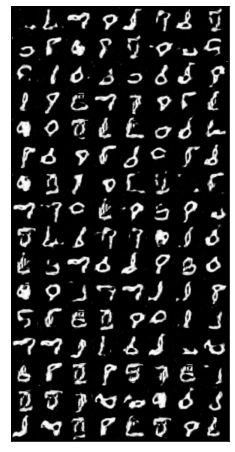

In [12]:
import torch
import matplotlib.pyplot as plt 
from torchvision.utils import make_grid, save_image 
from siren.data.utils import denorm 

z = torch.randn(128, 2)
img = denorm(model.G(z))
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(make_grid(img.cpu().detach(), nrow=8).permute(1, 2, 0))

In [13]:
import numpy as np

for i, val in enumerate(z.tolist()):
    print('{} {}'.format(i + 1, val))

1 [-1.5349959135055542, 0.5159196853637695]
2 [1.3968464136123657, -0.004682736936956644]
3 [-0.8101850748062134, 0.698357105255127]
4 [0.07957787811756134, 1.2911829948425293]
5 [-0.9518172740936279, -0.9442412257194519]
6 [-0.4730130732059479, 0.815244197845459]
7 [0.7355217933654785, -0.6708794236183167]
8 [0.7873265147209167, 0.22882242500782013]
9 [1.966062307357788, 1.0958058834075928]
10 [-0.6084979176521301, -0.3375873863697052]
11 [0.16133174300193787, -0.10851767659187317]
12 [0.7510294914245605, 2.379077196121216]
13 [0.8749353885650635, 0.17922411859035492]
14 [-0.21469855308532715, 1.372612714767456]
15 [-1.2777624130249023, 0.5463881492614746]
16 [0.6070122122764587, -0.1506887525320053]
17 [1.0390836000442505, -0.3186042010784149]
18 [-0.5457207560539246, -1.4061295986175537]
19 [1.369499683380127, -0.8292849063873291]
20 [1.662147045135498, 1.1115248203277588]
21 [-1.5627597570419312, -1.6035250425338745]
22 [-1.185666561126709, 1.6261193752288818]
23 [-1.02379703521728